In [144]:
%reset

import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import pickle
import io
import pdb

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


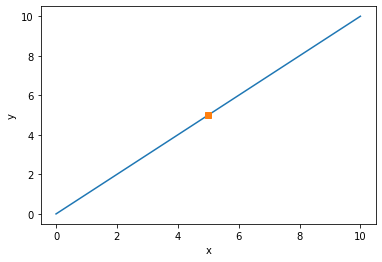

In [145]:
xx = np.linspace(0., 10., num = 10)
yy = np.linspace(0., 10., num = 10)

fig, ax = pl.subplots(1,1)
ax.plot(xx, yy)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([5.],[5.], marker = 's')

In [168]:
def terrible_ify(input_fig, verbose = False):
    buf = io.BytesIO()
    pickle.dump(input_fig, buf)
    buf.seek(0)
    new_fig = pickle.load(buf) 
    
    ax_list = new_fig.axes
    num_axes = len(ax_list)
    
    for axi in ax_list:
        # Mess up axis range
        if verbose: print("Screwing up axis ranges...")
        xlim = axi.get_xlim()
        ylim = axi.get_xlim()        
        new_xlim = (np.random.uniform(low=0.1*xlim[0],high=10.*xlim[0]),\
                    np.random.uniform(low=0.1*xlim[1],high=10.*xlim[1]))
        new_ylim = (np.random.uniform(low=0.1*ylim[0],high=10.*ylim[0]),\
                    np.random.uniform(low=0.1*ylim[1],high=10.*ylim[1]))
        axi.set_xlim(new_xlim)
        axi.set_ylim(new_ylim)

        # Mess up fonts on axis labels
        rand_font = np.random.randint(0,2)
        xlabel = axi.get_xlabel()
        ylabel = axi.get_ylabel()
        if (rand_font == 0):
            if verbose: print("Making label fonts too small...")
            #Make fonts way too small
            axi.set_xlabel(xlabel, fontsize = 7)
            axi.set_ylabel(ylabel, fontsize = 7)
        if (rand_font == 1):
            if verbose: print("Making label fonts too large...")
            #Make fonts way too large
            axi.set_xlabel(xlabel, fontsize = 30)
            axi.set_ylabel(ylabel, fontsize = 30)
            
        #Mess up fonts on tick labels
        if verbose: print("Messing up tick labels...")
        axi.tick_params(axis='both', which='major', labelsize=np.random.randint(5,40))
        axi.tick_params(axis='both', which='minor', labelsize=np.random.randint(5,40))
            
        #Turn minor tick labels on or off
        rand_minor = np.random.randint(0,2)
        if (rand_minor == 1):
            axi.minorticks_off()
        else:
            axi.minorticks_on()
            
        # Mess up colors
        num_lines = len(axi.lines)
        if (num_lines > 0):
            for li in axi.lines:
                li.set_color('brown')        
    
        #Screw up aspect ratio
        rand_aspect = np.random.randint(0,2)
        if (rand_aspect == 1):
            if verbose: print("Messing up aspect ratio...")
            axi.set_aspect(3)
            
        #Invert x axis
        rand_invert = np.random.randint(0,2)
        if (rand_invert):
            axi.invert_xaxis()
            
        #Create new terrible legend
        if verbose: print("Creating a new legend...")
        if (num_lines > 0):
            legend_option = np.random.randint(0,3)
            if (legend_option == 0):
                red_patch = mpatches.Patch(color='red', label='The data')
                axi.legend(handles=[red_patch])            
            if (legend_option == 1):
                lines = [Line2D([0], [0], color='limegreen', lw=4),Line2D([0], [0], color='brown', lw=4)]
                axi.legend(lines, ['1'])            
            if (legend_option == 2):
                lines = [Line2D([0], [0], color='limegreen', lw=4),Line2D([0], [0], color='brown', lw=4),
                        Line2D([0], [0], color='black', lw=4),Line2D([0], [0], color='brown', lw=4),
                        Line2D([0], [0], color='black', lw=4),Line2D([0], [0], color='brown', lw=4),
                        Line2D([0], [0], color='orange', lw=4),Line2D([0], [0], color='brown', lw=4)]
                axi.legend(lines, ['d','a','t','a'])
    
    return new_fig
    
fig2 = terrible_ify(fig)

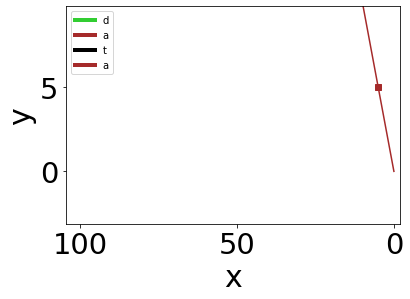

In [169]:
fig2
